Using your prefered language, process the files in the `data` directory to:
- Remove the `C_FIRST_NAME`, `C_LAST_NAME` properties of each JSON object.
- Extract the domain from `C_EMAIL_ADDRESS`, store it in `C_EMAIL_DOMAIN` and delete the original field.
- Write the resulting output to another file.


In [1]:
!pwd

/Users/jackhousego/code/DuplexFuture/z_pii/notebooks


In [54]:
import json
import jsonlines
import pandas as pd

In [92]:
file_1_path = '../raw_data/data-exports/TPCDS_SF10TCL/customer/2021-01-10.txt'
file_2_path = '../raw_data/data-exports/TPCDS_SF10TCL/customer/2021-01-11.txt'

In [50]:
def clean_line(line):
    """
    For each data entry (line) in .txt file, the line will be cleaned.
    Remove whitespace, remove new line operators, str brackets 
    
    Returns a list of str of key:value pairs 
    """
    line = line.split(',   ') # split on comma and empty space 
    data = []
    for pair in line:
        data.append(pair.replace("{", "").replace("}", "").replace("\n", "").replace('"', '').strip())

    return data

def line_to_dict(split_Line):
    """
    Convert each data entry into a dictionary with key:value pairs.
    Returns a dictionary 
    Use ':' to split key and value pair 
    """
    line_dict = {}
    for part in split_Line:
        key, value = part.split(":", maxsplit=1)
#         print(key, value)
        line_dict[key] = value.strip()

    return line_dict


def load_data():
    with open(file_1_path) as f:
#     for line in f:
#         command, description = line.strip().split(None, 1)
#         dict1[command] = description.strip()
        lines = f.readlines()
    data = []
    for line in lines:
        cleaned_line = clean_line(line)
        formatted_line = line_to_dict(cleaned_line)
        data.append(formatted_line)
    
    return data
        

In [39]:
with open(file_1_path) as f:
#     for line in f:
#         command, description = line.strip().split(None, 1)
#         dict1[command] = description.strip()
    lines = f.readlines()

In [40]:
lines[7]

'{    "C_BIRTH_COUNTRY": "KOREA, REPUBLIC OF",    "C_BIRTH_DAY": 26,    "C_BIRTH_MONTH": 12,    "C_BIRTH_YEAR": 1938,    "C_CURRENT_ADDR_SK": 3816598,    "C_CURRENT_CDEMO_SK": 1215897,    "C_CURRENT_HDEMO_SK": 2471,    "C_CUSTOMER_ID": "AAAAAAAAIAAAAAAA",    "C_CUSTOMER_SK": 8,    "C_EMAIL_ADDRESS": "Ollie.Shipman@be.org",    "C_FIRST_NAME": "Ollie",    "C_FIRST_SALES_DATE_SK": 2449376,    "C_FIRST_SHIPTO_DATE_SK": 2449406,    "C_LAST_NAME": "Shipman",    "C_LAST_REVIEW_DATE": "2452334",    "C_PREFERRED_CUST_FLAG": "N",    "C_SALUTATION": "Sir"  }\n'

In [51]:
load_data()

[{'C_BIRTH_COUNTRY': 'CHILE',
  'C_BIRTH_DAY': '9',
  'C_BIRTH_MONTH': '12',
  'C_BIRTH_YEAR': '1936',
  'C_CURRENT_ADDR_SK': '27782946',
  'C_CURRENT_CDEMO_SK': '980124',
  'C_CURRENT_HDEMO_SK': '7135',
  'C_CUSTOMER_ID': 'AAAAAAAABAAAAAAA',
  'C_CUSTOMER_SK': '1',
  'C_EMAIL_ADDRESS': 'Javier.Lewis@VFAxlnZEvOx.org',
  'C_FIRST_NAME': 'Javier',
  'C_FIRST_SALES_DATE_SK': '2452208',
  'C_FIRST_SHIPTO_DATE_SK': '2452238',
  'C_LAST_NAME': 'Lewis',
  'C_LAST_REVIEW_DATE': '2452508',
  'C_PREFERRED_CUST_FLAG': 'Y',
  'C_SALUTATION': 'Mr.'},
 {'C_BIRTH_COUNTRY': 'TOGO',
  'C_BIRTH_DAY': '9',
  'C_BIRTH_MONTH': '4',
  'C_BIRTH_YEAR': '1966',
  'C_CURRENT_ADDR_SK': '11181655',
  'C_CURRENT_CDEMO_SK': '819667',
  'C_CURRENT_HDEMO_SK': '1461',
  'C_CUSTOMER_ID': 'AAAAAAAACAAAAAAA',
  'C_CUSTOMER_SK': '2',
  'C_EMAIL_ADDRESS': 'Amy.Moses@Ovk9KjHH.com',
  'C_FIRST_NAME': 'Amy',
  'C_FIRST_SALES_DATE_SK': '2452288',
  'C_FIRST_SHIPTO_DATE_SK': '2452318',
  'C_LAST_NAME': 'Moses',
  'C_LAST_REVIEW

value convert to integers:
- 'C_BIRTH_DAY'
- 'C_BIRTH_MONTH'
- 'C_BIRTH_YEAR'
- 

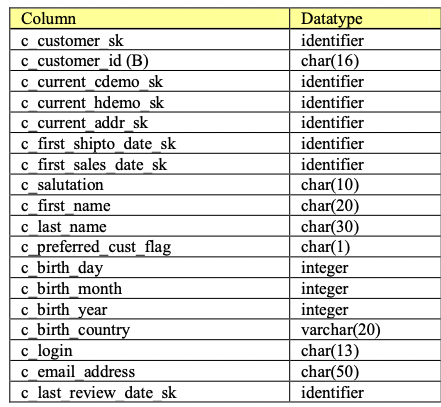

In [69]:
def load_jsonline(text_file_path):

    with jsonlines.open(text_file_path) as f:
#         print(f)
        data_long = []
        for line in f.iter():
            
            data_long.append(line)
    
    return data_long


In [72]:
test = load_jsonline(file_1_path)[0]
test

{'C_BIRTH_COUNTRY': 'CHILE',
 'C_BIRTH_DAY': 9,
 'C_BIRTH_MONTH': 12,
 'C_BIRTH_YEAR': 1936,
 'C_CURRENT_ADDR_SK': 27782946,
 'C_CURRENT_CDEMO_SK': 980124,
 'C_CURRENT_HDEMO_SK': 7135,
 'C_CUSTOMER_ID': 'AAAAAAAABAAAAAAA',
 'C_CUSTOMER_SK': 1,
 'C_EMAIL_ADDRESS': 'Javier.Lewis@VFAxlnZEvOx.org',
 'C_FIRST_NAME': 'Javier',
 'C_FIRST_SALES_DATE_SK': 2452208,
 'C_FIRST_SHIPTO_DATE_SK': 2452238,
 'C_LAST_NAME': 'Lewis',
 'C_LAST_REVIEW_DATE': '2452508',
 'C_PREFERRED_CUST_FLAG': 'Y',
 'C_SALUTATION': 'Mr.'}

In [73]:
new_dict = {key: val for key,
            val in test.items() if key not in ['C_FIRST_NAME', 'C_LAST_NAME']}
 

In [74]:
new_dict

{'C_BIRTH_COUNTRY': 'CHILE',
 'C_BIRTH_DAY': 9,
 'C_BIRTH_MONTH': 12,
 'C_BIRTH_YEAR': 1936,
 'C_CURRENT_ADDR_SK': 27782946,
 'C_CURRENT_CDEMO_SK': 980124,
 'C_CURRENT_HDEMO_SK': 7135,
 'C_CUSTOMER_ID': 'AAAAAAAABAAAAAAA',
 'C_CUSTOMER_SK': 1,
 'C_EMAIL_ADDRESS': 'Javier.Lewis@VFAxlnZEvOx.org',
 'C_FIRST_SALES_DATE_SK': 2452208,
 'C_FIRST_SHIPTO_DATE_SK': 2452238,
 'C_LAST_REVIEW_DATE': '2452508',
 'C_PREFERRED_CUST_FLAG': 'Y',
 'C_SALUTATION': 'Mr.'}

**Add in a test here that ensures that len of new dictionary is 2 less than before? **

In [80]:
new_dict['C_EMAIL_DOMAIN'] = new_dict['C_EMAIL_ADDRESS'].split("@")[1]

In [81]:
new_dict

{'C_BIRTH_COUNTRY': 'CHILE',
 'C_BIRTH_DAY': 9,
 'C_BIRTH_MONTH': 12,
 'C_BIRTH_YEAR': 1936,
 'C_CURRENT_ADDR_SK': 27782946,
 'C_CURRENT_CDEMO_SK': 980124,
 'C_CURRENT_HDEMO_SK': 7135,
 'C_CUSTOMER_ID': 'AAAAAAAABAAAAAAA',
 'C_CUSTOMER_SK': 1,
 'C_EMAIL_ADDRESS': 'Javier.Lewis@VFAxlnZEvOx.org',
 'C_FIRST_SALES_DATE_SK': 2452208,
 'C_FIRST_SHIPTO_DATE_SK': 2452238,
 'C_LAST_REVIEW_DATE': '2452508',
 'C_PREFERRED_CUST_FLAG': 'Y',
 'C_SALUTATION': 'Mr.',
 'C_EMAIL_DOMAIN': 'VFAxlnZEvOx.org'}

In [104]:
class DataProcessor():
    
    def __init__(self, file_path):
        self.file_path = file_path
        pass
    
    def load_transform_data(self):
        with jsonlines.open(self.file_path) as f:
            self.data = []
            for data_record in f.iter(): #dictionary
                data_record = self.remove_name(data_record)
                data_record = self.retreive_domain(data_record)
                
                self.data.append(data_record)
        
    def remove_name(self, data_dict):
        """
        Clean an individual data record 
        Argument [dict]
        1. Remove First and Second name entries 
        Return [dict]
        """
        
        # Here I have added extra terms outwidth the brief
        keys_to_remove = ['C_FIRST_NAME', 'C_LAST_NAME', "C_SALUTATION"]
        
        return {key: val for key, val in data_dict.items() if key not in keys_to_remove}
 
    
    def retreive_domain(self, data_dict):
        """
        Argument [dict]
        1. Retrieve email domain and remove original email address
        Return [dict]
        """
        key_to_remove = ['C_EMAIL_ADDRESS']
        try:
            data_dict['C_EMAIL_DOMAIN'] = data_dict['C_EMAIL_ADDRESS'].split("@")[1]
        except:
            data_dict['C_EMAIL_DOMAIN'] = None
        
        return {key: value for key, value in data_dict.items() if key not in key_to_remove}
        
    def write_to_file(self):
        with jsonlines.open(file='2021-01-10-TRANSFORMED.txt', mode='w') as f:
            for record in self.data:
                f.write(record)


In [105]:
data_class = DataProcessor(file_1_path)
data_class.load_transform_data()
data_class.write_to_file()

In [93]:
data_class2 = DataProcessor(file_2_path)
data_class2.load_transform_data()

[{'C_BIRTH_COUNTRY': 'SUDAN',
  'C_BIRTH_DAY': 27,
  'C_BIRTH_MONTH': 11,
  'C_BIRTH_YEAR': 1944,
  'C_CURRENT_ADDR_SK': 28053994,
  'C_CURRENT_CDEMO_SK': 1031854,
  'C_CURRENT_HDEMO_SK': 5724,
  'C_CUSTOMER_ID': 'AAAAAAAAFPBAAAAA',
  'C_CUSTOMER_SK': 501,
  'C_FIRST_SALES_DATE_SK': 2451867,
  'C_FIRST_SHIPTO_DATE_SK': 2451897,
  'C_LAST_REVIEW_DATE': '2452551',
  'C_PREFERRED_CUST_FLAG': 'Y',
  'C_SALUTATION': 'Miss',
  'C_EMAIL_DOMAIN': '0XaJ26cuYhkiVEyekg.com'},
 {'C_BIRTH_COUNTRY': 'MALI',
  'C_BIRTH_DAY': 17,
  'C_BIRTH_MONTH': 2,
  'C_BIRTH_YEAR': 1953,
  'C_CURRENT_ADDR_SK': 19905808,
  'C_CURRENT_CDEMO_SK': 846749,
  'C_CURRENT_HDEMO_SK': 3655,
  'C_CUSTOMER_ID': 'AAAAAAAAGPBAAAAA',
  'C_CUSTOMER_SK': 502,
  'C_FIRST_SALES_DATE_SK': 2449575,
  'C_FIRST_SHIPTO_DATE_SK': 2449605,
  'C_LAST_REVIEW_DATE': '2452590',
  'C_PREFERRED_CUST_FLAG': 'N',
  'C_SALUTATION': 'Sir',
  'C_EMAIL_DOMAIN': 'a.org'},
 {'C_BIRTH_COUNTRY': 'SRI LANKA',
  'C_BIRTH_DAY': 24,
  'C_BIRTH_MONTH': 1,
  'C

In [106]:
test="../raw_data/data-exports/TPCDS_SF10TCL/customer/2021-01-11.txt"

import re

In [107]:
regex = "\d{4}-\d{2}-\d{2}"
m = re.search(regex, test)
m

<re.Match object; span=(48, 58), match='2021-01-11'>

In [109]:
m.group(0)

'2021-01-11'

In [110]:
saved_file_path = "raw_data/data-exports/TPCDS_SF10TCL/customer/"
file_name= '2021-01-11'

In [111]:
f"{saved_file_path + file_name}-TRANSFORMED.txt"

'raw_data/data-exports/TPCDS_SF10TCL/customer/2021-01-11-TRANSFORMED.txt'

**TEST IDEAS**
- check that new file has same amount of rows / same size 
- check that new file does not contain names, email names etc 
